In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Reading data from csv file

dataset = pd.read_csv('../DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

In [3]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [5]:
# Prediction

y_pred = knn.predict(x_test)

In [6]:
# Mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.3349529390503197

In [7]:
# R2 Score

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9831988568926218

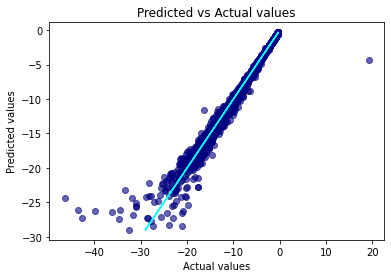

In [8]:
import matplotlib.pyplot as plt

def generatePredictionPlot(y_test, y_pred):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_pred, y_pred,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_test, y_pred)

In [11]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(13, 15, SAMPLE_SIZE)
rand_height = randomSample(13, 15, SAMPLE_SIZE)
rand_freq = randomSample(1, 5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_freq[i]])

y_pred_rand = knn.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_freq[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)

Predicted Values for random samples

   Height  Radius  Frequency        S11
0   13.32   13.01       1.20  -0.429351
1   14.41   14.57       2.91  -6.973702
2   14.51   13.12       4.00  -2.203381
3   14.95   13.92       3.29  -7.959194
4   13.59   13.06       2.46  -0.721569
5   14.95   13.39       4.82  -7.356748
6   13.55   14.54       3.78  -2.588942
7   13.10   13.76       3.40 -10.292606
8   13.89   14.66       1.10  -0.440828
9   14.71   14.60       2.17  -0.675240
